Trader Behavior vs Market Sentiment Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
trades = pd.read_csv("/content/historical_data.csv")
sentiment = pd.read_csv("/content/fear_greed_index.csv")

In [12]:
print(trades.columns)
print(sentiment.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [50]:
trades['year_month'] = pd.to_datetime(trades['Timestamp'], errors='coerce').dt.to_period('M')
sentiment['year_month'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.to_period('M')

In [44]:
trades['Closed PnL'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')
trades['Size USD'] = pd.to_numeric(trades['Size USD'], errors='coerce')

trades = trades.dropna(subset=['year_month', 'Closed PnL', 'Size USD'])
sentiment = sentiment.dropna(subset=['year_month', 'classification'])

In [47]:
merged = pd.merge(
    trades,
    sentiment,
    on='year_month',
    how='inner'
)

print("Rows after merge:", merged.shape[0])
print(merged['classification'].value_counts())

Rows after merge: 0
Series([], Name: count, dtype: int64)


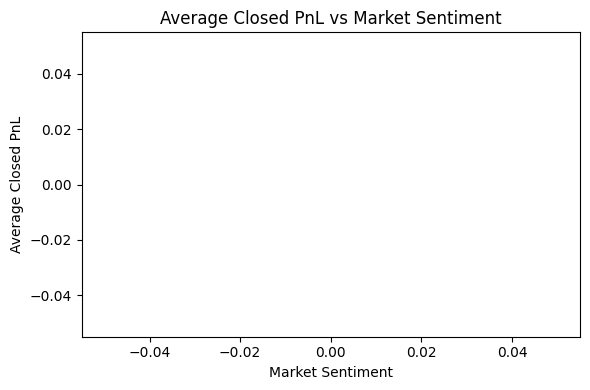

In [48]:
profit_by_sentiment = merged.groupby('classification')['Closed PnL'].mean()
plt.figure(figsize=(6,4))
plt.bar(profit_by_sentiment.index, profit_by_sentiment.values)
plt.title("Average Closed PnL vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.show()